# K-近邻算法（KNN）

K nearest neighbour

距离的概念：
一维空间 

## 0、导引

### 如何进行电影分类
众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。

本章介绍第一个机器学习算法：K-近邻算法，它非常有效而且易于掌握。

## 1、k-近邻算法原理

简单地说，K-近邻算法采用测量不同特征值之间的距离方法进行分类。

- 优点：精度高、对异常值不敏感、无数据输入假定。
- 缺点：时间复杂度高、空间复杂度高。
- 适用数据范围：数值型和标称型。

### 工作原理

存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输人没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前K个最相似的数据，这就是K-近邻算法中K的出处,通常*K是不大于20的整数。
最后 ，选择K个最相似数据中出现次数最多的分类，作为新数据的分类*。

回到前面电影分类的例子，使用K-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，下图显示了6部电影的打斗和接吻次数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用K-近邻算法来解决这个问题。

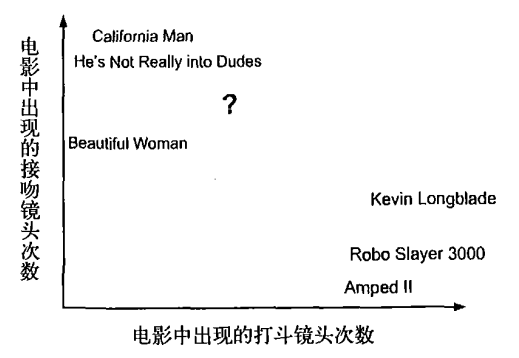

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，上图中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见下表。

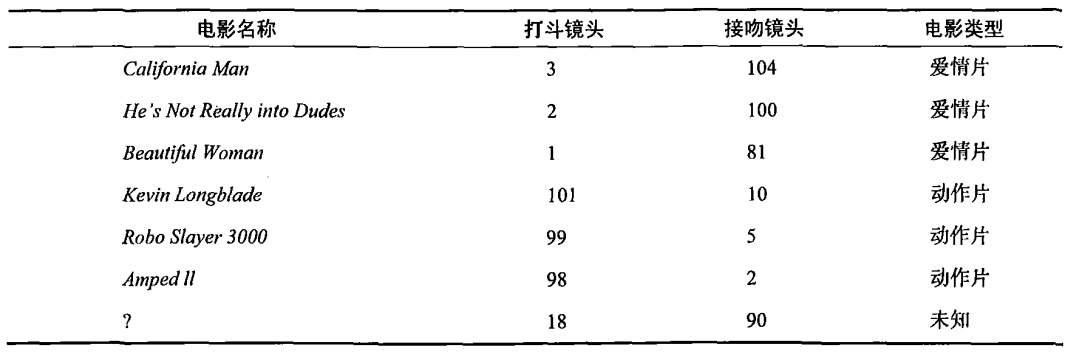

即使不知道未知电影属于哪种类型，我们也可以通过某种方法计算出来。首先计算未知电影与样本集中其他电影的距离，如图所示。

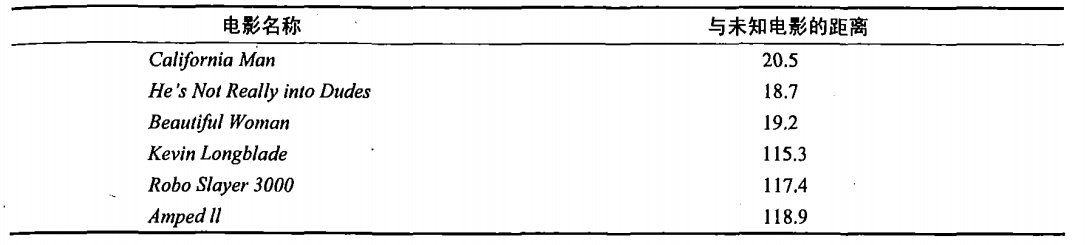

现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到K个距
离最近的电影。假定k=3，则三个最靠近的电影依次是California Man、He's Not Really into Dudes、Beautiful Woman。K-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

### 欧几里得距离(Euclidean Distance)

欧氏距离是最常见的距离度量，衡量的是多维空间中各个点之间的绝对距离。公式如下：

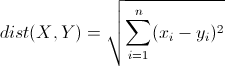

K-近邻算法的步骤：

1、我们求未知点到所有样本点的距离

2、对以上求的距离进行排序（从小到大）

3、对排序号的样本点取前K个（注意K值一般不大于20）

4、对这前K个样本的标签进行分析，如果某一样本标签占优势那么未知点就属于该标签的类别


## 2、在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 回归问题：from sklearn.neighbors import KNeighborsRegressor

### 0）一个最简单的例子

根据身高、体重和鞋子尺码来判断性别

In [2]:
import numpy as np

In [3]:
#构造特征数据
x = np.array([[172,60,42],
             [168,56,40],
             [189,70,44],
             [160,45,36],
             [163,50,42],
             [170,65,41]])
#给上面的特征标签加数据
y = np.array(['男','女','男','女','男','女'])


In [4]:
#构造一组未知的数据
x_test = np.array([[175,75,43],[170,60,38],[165,50,40]])

In [5]:
#导入相关算法
from sklearn.neighbors import KNeighborsClassifier
#sklearn全称scikit-learn，它是一个机器学习的系统库，几乎包含了所有机器学习的经典算法
#另外这个库还包含了大量的实验数据，还有一些数据清洗、处理的算法
#sklearn这个库封装度极高，对于开发者基本透明，开发者可以在完全不了解某个算法的底层
#原理的时候，使用算法的sklearn模型

In [6]:
# 1.创建算法模型，k-近邻分类模型
knn = KNeighborsClassifier(n_neighbors=3)
#n_neighbors代表k-近邻算法取的前k个邻居，默认为5，一般不超过20

In [7]:
#2.用创建好的算法模型，对已有的数据进行训练
knn.fit(x,y)
#在k-近邻里面，训练过程就是告诉knn对象，x里面的数据对应到y中代表谁

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [8]:
#3.根据已有的数据基础对未知的数据进行预测(上面knn已经训练过了)
knn.predict(x_test)
#分别拿x_test中的每一条数据和已知数据进行k-近邻运算

array(['男', '女', '女'], dtype='<U1')

In [9]:
#性能检测
#由于未设置测试数据，无法进行性能检测

### 1）用于分类

In [10]:
#导入sklearn的官方数据库
from sklearn import datasets

/home/dyx/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [11]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
#提取特征数据
data = iris.data
#提取标签数据
target = iris.target
data.shape,target.shape

((150, 4), (150,))

In [13]:
#【注意】机器学习最后需要进行性能评测，需要把我们的数据提取出来一部分作为测试数据
#sklearn提供了一个训练数据和测试数据切分的方法
from sklearn.model_selection import train_test_split

In [14]:
#这个方法首先会把data和target随机打乱，提取出10%的数据（包括特征和标签）作为试数据
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.1)
#这个函数返回一个列表，包含训练特征、测试特征、训练标签、测试标签

In [15]:
#创建模型
knn =KNeighborsClassifier(n_neighbors=5)


In [16]:
#训练
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
#预测
y_ = knn.predict(x_test)

In [18]:
y_,y_test
#y_是预测出来的标签，y_test是真正的标签

(array([1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1]),
 array([1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1]))

In [19]:
#性能评测：查看准确率
knn.score(x_test,y_test)

1.0

#### 用图像来表述分类的过程

4个特征用二维图像无法表述，取两个特征

In [20]:
x_train = data[:,:2]
x_train.shape

(150, 2)

In [21]:
plt.scatter(x_train[:,:2],x_train[:,1],c = target)

NameError: name 'plt' is not defined

### 2）用于回归  
回归用于对趋势的预测

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
x_train = np.random.rand(80,1)*10
x_train = np.sort(x_train,axis=0)
x_train

array([[0.03763726],
       [0.18355763],
       [0.23600058],
       [0.37701599],
       [0.42181533],
       [0.46025227],
       [0.79794787],
       [0.90620366],
       [1.16560582],
       [1.25318857],
       [1.25920526],
       [1.44568352],
       [1.50567067],
       [1.60007312],
       [1.90402964],
       [1.95785949],
       [2.07155892],
       [2.07418418],
       [2.1620253 ],
       [2.23899814],
       [2.30586705],
       [2.33346849],
       [2.3621539 ],
       [2.48717085],
       [2.49516913],
       [2.5293256 ],
       [2.59336919],
       [2.87155409],
       [3.02220413],
       [3.02388214],
       [3.14730691],
       [3.17033949],
       [3.20958527],
       [3.220383  ],
       [3.25945025],
       [3.38611369],
       [3.42625573],
       [3.54159796],
       [3.65780442],
       [4.16670256],
       [4.46444472],
       [5.00492589],
       [5.01805444],
       [5.35270097],
       [5.43624398],
       [5.45035317],
       [5.58565037],
       [5.686

In [36]:
y_train = np.random.randn(80,1)

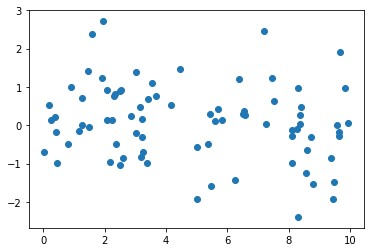

In [37]:
plt.scatter(x_train,y_train)

### 练习
人类动作识别  
步行，上楼，下楼，坐着，站立和躺着  
![](stand-sit-run.jpg)  
数据采集每个人在腰部穿着智能手机，进行了六个活动（步行，上楼，下楼，坐着，站立和躺着）。采用嵌入式加速度计和陀螺仪，以50Hz的恒定速度捕获3轴线性加速度和3轴角速度，来获取数据

导入相关训练数据和测试数据

In [23]:
x_train = np.load('./x_train.npy')
x_test = np.load('./x_test.npy')
y_train = np.load('./y_train.npy')
y_test = np.load('./y_test.npy')

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7352, 561), (2947, 561), (7352,), (2947,))

In [25]:
y_test[:100]
#1代表步行   2代表上楼   3代表下楼   4代表坐着  5代表站立

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
#给1-6六个标签起名字
labels = {
    1:'wallking',
    2:'up',
    3:'down',
    4:'sitting',
    5:'standing',
    6:'lying'
}

In [27]:
#创建模型
knn = KNeighborsClassifier()

In [28]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
#预测
y_ = knn.predict(x_test)

In [30]:
y_[:100],y_test[:100]

(array([5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 4, 4, 5, 4, 4, 5, 4, 4,
        4, 4, 4, 5, 5, 4, 5, 5, 5, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [31]:
#查看准确率
knn.score(x_test,y_test)

0.9015948422124194

取20个测试动作，画出其特征的图像，对其预测的动作和真实的动作

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

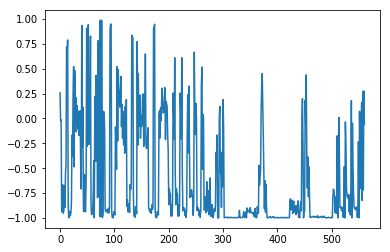

In [33]:
plt.plot(x_test[0])

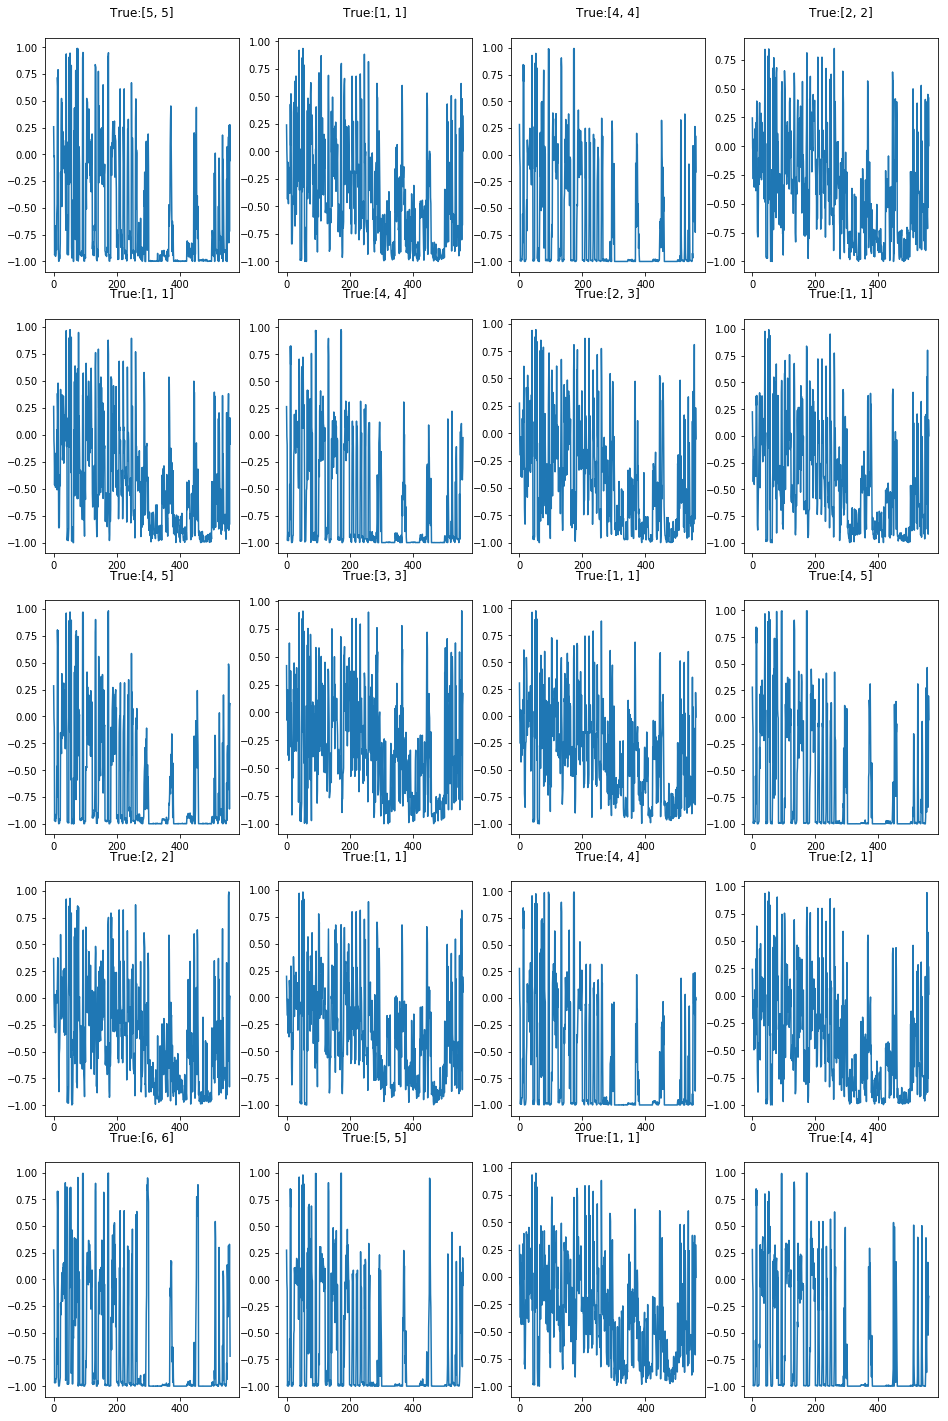

In [34]:
#设置plt面板大小
fig = plt.figure(figsize = (4*4,5*5))
for i in range(20):
    #画出20个子轴面
    axes = fig.add_subplot(5,4,i+1)
    
    #向每一个子轴面中画图
    axes.plot(x_test[i*100])
    #设置标题
    axes.set_title('True:%s\n'%([y_test[i*100],y_[i*100]]))

## 3、作业

#### 1、预测年收入是否大于50K美元

读取adult.txt文件，最后一列是年收入，并使用KNN算法训练模型，然后使用模型预测一个人的年收入是否大于50

#### 2、小麦种类预测

读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

#### 3、改进约会网站的匹配效果

读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度